In [1]:
#Basic python analysis libraries
import pandas as pd
import numpy as np

#Plotting library to view a sample image
import matplotlib.pyplot as plt

#Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras

#sklearn function to randomly split train data into validation and train data
from sklearn.model_selection import train_test_split

In [2]:
def open_and_configure_data():
    
    '''Opens the train and test CSV files. The train file is split into train and validation data'''
    
    train = pd.read_csv('train.csv')
    y_train = train.label.values
    train.drop('label', axis=1, inplace=True)
    
    X_test = pd.read_csv('test.csv').values
    
    X_train, X_valid, y_train, y_valid = train_test_split(train.values, y_train, train_size=0.8)  
    
    print('X_train shape', X_train.shape)
    print('y_train shape', y_train.shape)
    print('X_valid shape', X_valid.shape)
    print('y_valid shape', y_valid.shape)
    print('X_test shape', X_test.shape)
    
    return X_train, y_train, X_valid, y_valid, X_test

In [3]:
X_train, y_train, X_valid, y_valid, X_test = open_and_configure_data()

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X_train shape (33600, 784)
y_train shape (33600,)
X_valid shape (8400, 784)
y_valid shape (8400,)
X_test shape (28000, 784)


(<matplotlib.image.AxesImage at 0x386b33dc88>, 8)

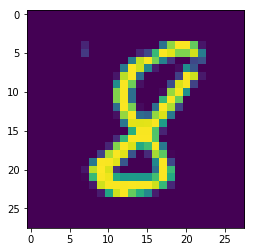

In [4]:
#Plot a sample image along with its label
plt.imshow(X_train[0].reshape(-1, 28)), y_train[0]

In [5]:
def build_nn_model():
    
    '''Construct and compile a keras deep learning neural network'''
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(batch_size=32, shape=784,))
    model.add(keras.layers.Dense(784, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(784, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(784, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Dense(784, activation='relu'))
    model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
    
    model.compile(optimizer=keras.optimizers.Adam(), 
                  metrics=['accuracy'], 
                  loss=keras.losses.SparseCategoricalCrossentropy())
    
    return model

In [6]:
model = build_nn_model()

In [7]:
def train_model():
    
    '''Trains the neural network model constructed earlier'''
    
    model.fit(X_train, y_train, 
              epochs=100, 
              validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
                       keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4)])

In [8]:
train_model()

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 39s 1ms/sample - loss: 1.7404 - accuracy: 0.8196 - val_loss: 0.2724 - val_accuracy: 0.9268
Epoch 2/100
33600/33600 [==============================] - 38s 1ms/sample - loss: 0.3198 - accuracy: 0.9107 - val_loss: 0.2311 - val_accuracy: 0.9342
Epoch 3/100
33600/33600 [==============================] - 39s 1ms/sample - loss: 0.2611 - accuracy: 0.9286 - val_loss: 0.2252 - val_accuracy: 0.9427
Epoch 4/100
33600/33600 [==============================] - 39s 1ms/sample - loss: 0.2293 - accuracy: 0.9388 - val_loss: 0.1887 - val_accuracy: 0.9483
Epoch 5/100
33600/33600 [==============================] - 40s 1ms/sample - loss: 0.2201 - accuracy: 0.9414 - val_loss: 0.2309 - val_accuracy: 0.9446
Epoch 6/100
33600/33600 [==============================] - 39s 1ms/sample - loss: 0.2144 - accuracy: 0.9479 - val_loss: 0.1774 - val_accuracy: 0.9577
Epoch 7/100
33600/33600 [==========================

In [9]:
def generate_test_predictions():
    
    '''Predicts the class labels for the test dataset and dumps them in a csv file for upload to kaggle'''
    
    solution = model.predict_classes(X_test)
    index = np.arange(1, len(solution)+1)
    df = pd.DataFrame({'Label': solution}, index=np.arange(1, len(solution)+1))
    df.index.name = 'ImageId'
    df.to_csv('solution.csv', index=True)

In [10]:
generate_test_predictions() #Acheives 0.96982 on kaggle